<h1 align='center'>Data Exploration</h1>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Create a directory to store the figures

In [107]:
from pathlib import Path

FIGURES_PATH = Path("../reports/figures")
FIGURES_PATH.mkdir(parents=True, exist_ok=True)


In [60]:
df=pd.read_excel('../data/raw/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [61]:
df.shape

(7043, 33)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [63]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [66]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

### This show that the dataset is imbalanced

In [ ]:
df['Churn Label'].value_counts(normalize=True)


Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [71]:
df.isnull().sum()
#Only the Churn Reason column has missing values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### Some missing values are encoded as empty strings and must be handled in Preprocessing

In [70]:
(df['Total Charges']==" ").sum()

np.int64(11)

<h3 align='center'>Show Unique Values</h3>

1. All values has same Count Country State 
2. Numerical Values [Tenure Months, Monthly Charges, Total Charges]
3. Multiple Lines has [yes,no and no phone service] values
4. Internet Service has [DSL, Fiber optic, No] values
5. Online Security has [yes, no, no internet service] values
6. Online Backup has [yes, no, no internet service] values
7. Device Protection has [yes, no, no internet service] values
8. Tech Support has [yes, no, no internet service] values
9. Streaming TV has [yes, no, no internet service] values
10. Streaming Movies has [yes, no, no internet service] values

From 3 to 10 we don't have binary separable there is **3 values**


In [74]:
df['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df.duplicated().sum()

np.int64(0)

#### Majority Not Churned [Data is imbalanced]

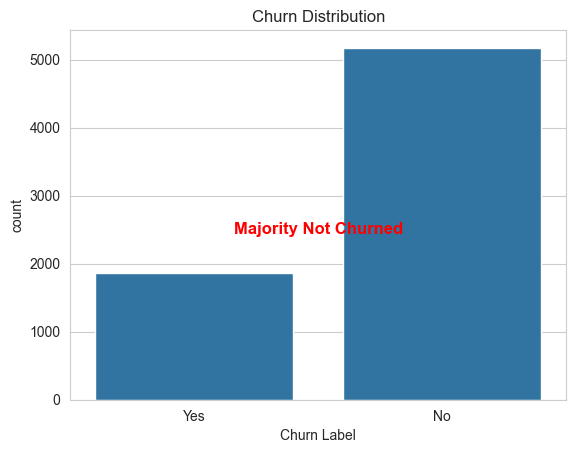

In [108]:
sns.countplot(x='Churn Label',data=df)
plt.text(x=0.5, y=2500, s="Majority Not Churned", 
         fontsize=12, color='red', fontweight='bold',
         ha='center', va='center')
plt.title('Churn Distribution')

plt.savefig(FIGURES_PATH/'churn_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

#### Show if there is  Skewed Values

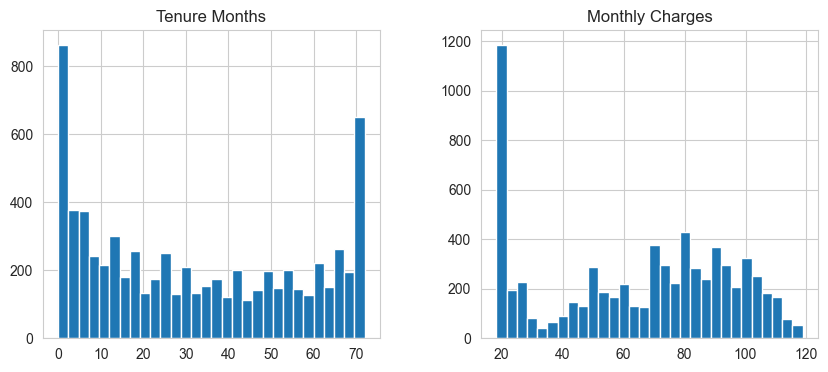

In [109]:
df[['Tenure Months','Monthly Charges']].hist(bins=30,figsize=(10,4))

plt.savefig(FIGURES_PATH/'tenure_monthly_charges.png',dpi=300,bbox_inches='tight')
plt.show()

#### There is no Outlier

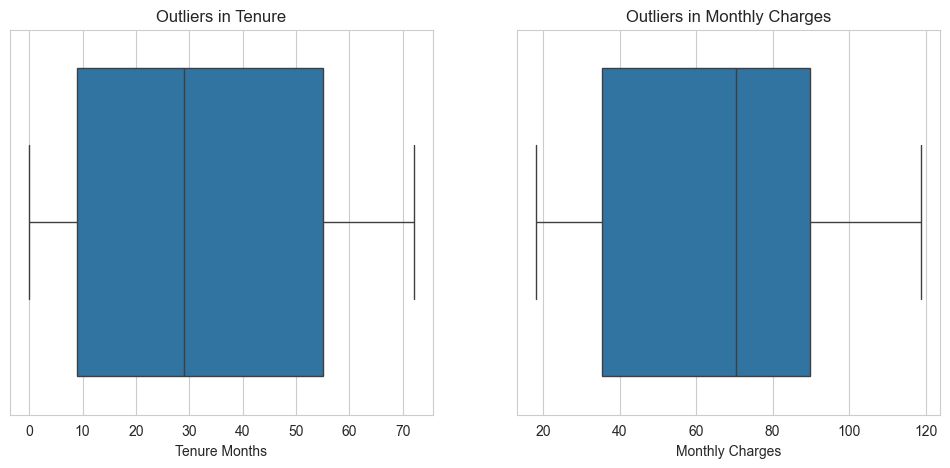

In [110]:
plt.figure(figsize=(12, 5))

# Plot Tenure
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Tenure Months'])
plt.title('Outliers in Tenure')

# Plot Monthly Charges
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Monthly Charges'])
plt.title('Outliers in Monthly Charges')


plt.savefig(FIGURES_PATH/'outliers.png',dpi=300,bbox_inches='tight')
plt.show()

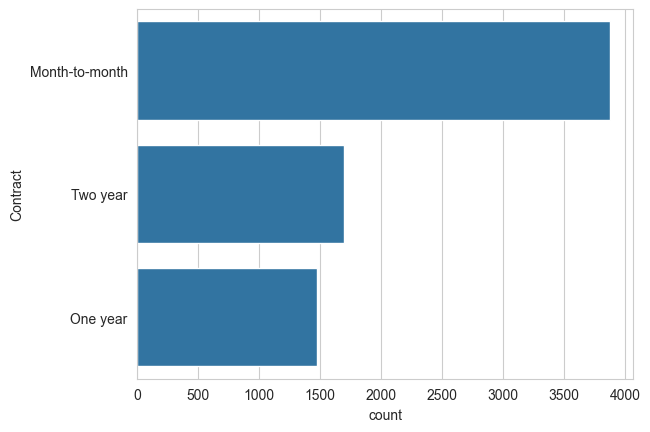

In [111]:
sns.countplot(y="Contract", data=df)
plt.savefig(FIGURES_PATH/'contract.png',dpi=300,bbox_inches='tight')
plt.show()


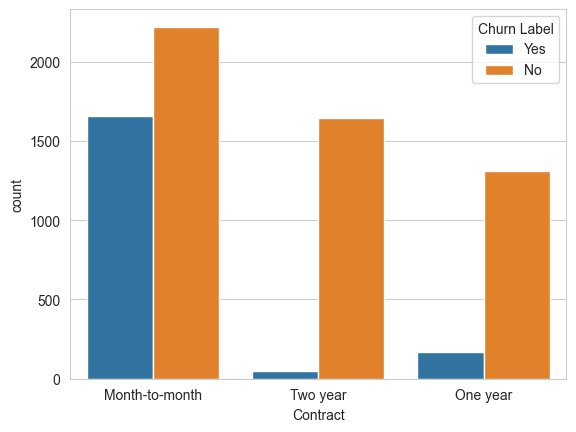

In [112]:
sns.countplot(x="Contract", hue="Churn Label", data=df)
plt.savefig(FIGURES_PATH/'contract_churn.png',dpi=300,bbox_inches='tight')
plt.show()


#### Outlier in Tenure Months with Churn 

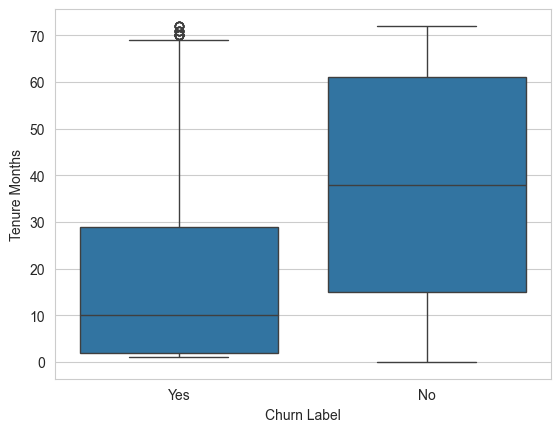

In [113]:
sns.boxplot(x="Churn Label", y="Tenure Months", data=df)
plt.savefig(FIGURES_PATH/'tenure_churn.png',dpi=300,bbox_inches='tight')
plt.show()


#### Churned Customer Pay More

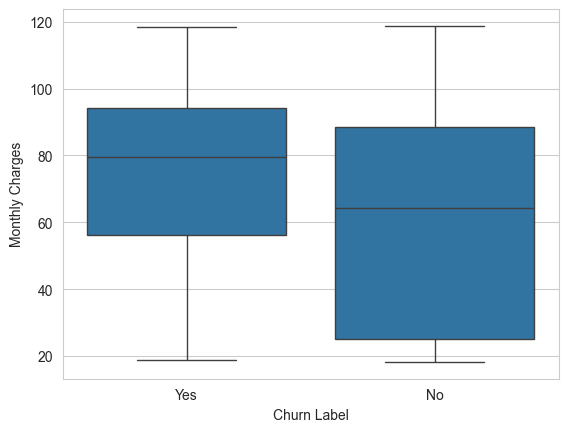

In [114]:
sns.boxplot(x="Churn Label", y="Monthly Charges", data=df)
plt.savefig(FIGURES_PATH/'monthly_charges_churn.png',dpi=300,bbox_inches='tight')
plt.show()

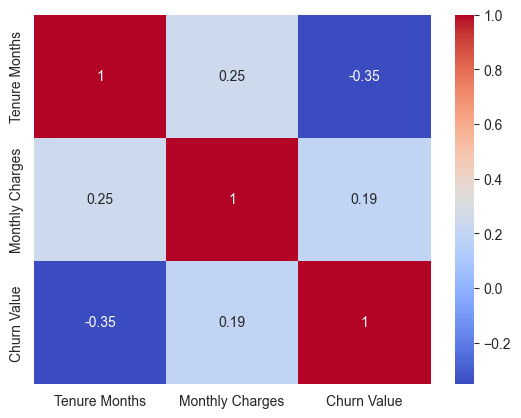

In [115]:
corr=df[['Tenure Months','Monthly Charges','Churn Value']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

plt.savefig(FIGURES_PATH/'correlation.png',dpi=300,bbox_inches='tight')
plt.show()

## Exploratory Data Analysis (EDA) Conclusions

The dataset consists of customer-level telecom information with a clear churn prediction objective. The target variable is represented by both **Churn Label** (categorical) and **Churn Value** (binary numeric), where **Churn Value** will be used as the primary modeling target.

### Key Observations

- The dataset shows **class imbalance**, with the majority of customers not churning. This indicates that accuracy alone will not be a reliable evaluation metric, and recall, F1-score, and ROC-AUC will be more appropriate during model evaluation.

- Several columns such as **Count, Country, and State** contain constant values across all records and do not contribute predictive information. These features can be safely removed during preprocessing.

- Numerical features are limited to **Tenure Months, Monthly Charges, and Total Charges**.  
  - Tenure Months and Monthly Charges exhibit **skewed distributions**, which may benefit from scaling.
  - No significant outliers were detected in Tenure Months or Monthly Charges.
  - An interesting exception was observed where a small number of long-tenure customers (over 70 months) still churned, particularly among partnered customers, indicating that tenure alone does not guarantee loyalty.

- Customers who churn tend to have **higher Monthly Charges**, suggesting that pricing may play a role in churn behavior.

- Multiple service-related features (e.g., Multiple Lines, Online Security, Streaming TV) are **not strictly binary** and include a third category such as *“No phone service”* or *“No internet service”*. This must be handled carefully during encoding to avoid incorrect assumptions during modeling.

- **Total Charges** and **Churn Reason** contain missing or empty values. These will be handled during preprocessing using appropriate imputation strategies.

### Correlation Analysis

- Correlation analysis among numerical features revealed no strong linear relationships:
  - Tenure Months and Monthly Charges show weak positive correlation (~0.25).
  - Tenure Months and Churn Value show moderate negative correlation (~ -0.35), indicating that longer-tenure customers are less likely to churn.
  - Monthly Charges and Churn Value show weak positive correlation (~0.19).

These results suggest that churn behavior is influenced by a combination of features rather than any single strong linear predictor.

### Summary

Overall, the dataset is well-suited for supervised learning with meaningful categorical and numerical features. Proper preprocessing, encoding, and metric selection will be critical to building an effective churn prediction model. The EDA phase highlights the importance of business-driven evaluation and careful feature handling in the subsequent modeling stage.
